### Case Study 4 :  Data Science Shark Tank:  Pitch Your Ideas

** Due Date: April 27, 6pm**
<img src="https://cp.inkrefuge.com/images%5Cpressreleases/shark%20tank_large.jpg" width="400px"> 

After the previous 3 case studies,  your team has now equipped with all the three powerful skills of data science: Hacking skill, Business skill and Math skill. In this project, your team is going to make use of these skills to come up with an idea of a new business/startup based upon data science technology. Your goal is to design a better service/solution on any data you like, develop a prototype/demo and prepare a pitch for your idea.
* Your team needs to decide which business problem is important for the market you are joining in (for example, social media market, housing market, search market, etc.).
* Then design a data science approach to improve one of the current services or design a new service on any data that you choose.
* The solution should include all the three components of data science: 1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how much are you evaluating the company; How are you planing to persuade the sharks to invest in your business; 2) the mathematical part to formulate the problem and develop math solution; 3) the programming part to collect the data, implement the math solution, and develop the prototype/demo.


# Background about Elevator Pitch (90 seconds) and Shark Tank

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("mrSmaCo29U4") 

In [4]:
YouTubeVideo("xIq8Sg59UdY") 

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 
* LinkedIn API: https://developer.linkedin.com/docs/rest-api
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition


** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

### Global Imports

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Save .csv file into Pandas Data Frame & HDF5 (Hierarchical Data Format)

In [102]:
csv_path = 'data/OnlineNewsPopularity.csv'
hdf_path = 'data/online_news_popularity.h5'

# Read .csv file into data frame
data_frame = pd.read_csv(csv_path, sep=', ', engine='python')

# Rename *channel* columns
data_frame.rename(columns={
        'data_channel_is_lifestyle': 'is_lifestyle',
        'data_channel_is_entertainment': 'is_entertainment',
        'data_channel_is_bus': 'is_business',
        'data_channel_is_socmed': 'is_social_media',
        'data_channel_is_tech': 'is_tech',
        'data_channel_is_world': 'is_world',
    }, inplace=True)

# Rename *weekday* columns
data_frame.rename(columns={
        'weekday_is_monday': 'is_monday',
        'weekday_is_tuesday': 'is_tuesday',
        'weekday_is_wednesday': 'is_wednesday',
        'weekday_is_thursday': 'is_thursday',
        'weekday_is_friday': 'is_friday',
        'weekday_is_saturday': 'is_saturday',
        'weekday_is_sunday': 'is_sunday',
    }, inplace=True)

# Store data into HDF5 file
data_hdf = pd.HDFStore(hdf_path)
data_hdf['data_frame'] = data_frame
data_hdf.close()

### Read HDF5 file into Pandas Data Frame

In [103]:
# Read .h5 file into data frame
data_frame = pd.read_hdf(hdf_path)

# Print data frame column headers
# print list(data_frame) # Shortest way
list(data_frame.columns.values) # Easy-to-read output

['url',
 'timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'is_lifestyle',
 'is_entertainment',
 'is_business',
 'is_social_media',
 'is_tech',
 'is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'is_monday',
 'is_tuesday',
 'is_wednesday',
 'is_thursday',
 'is_friday',
 'is_saturday',
 'is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarit

### A brief exploration

In [104]:
# Summary statistics for shares and number of words in the title
data_frame[['shares','n_tokens_title']].describe()

,shares,n_tokens_title
count,39644.000000,39644.000000
mean,3395.380184,10.398749
std,11626.950749,2.114037
min,1.000000,2.000000
25%,946.000000,9.000000
50%,1400.000000,10.000000
75%,2800.000000,12.000000
max,843300.000000,23.000000


In [105]:
# Mean shares for tech and not tech channels during and not during weekends
data_frame.pivot_table('shares', index=['is_weekend'], columns=['is_tech'], aggfunc=[np.mean], margins=True)

mean                          
is_tech             0.0          1.0          All
is_weekend                                       
0.0         3397.748296  2974.684514  3318.855140
1.0         3935.809792  3753.143322  3903.394412
All         3468.866772  3072.283283  3395.380184

                                                                mean
is_monday is_tuesday is_wednesday is_thursday is_friday             
0.0       0.0        0.0          0.0         0.0        3753.143322
                                              1.0        3050.812942
                                  1.0         0.0        2744.542748
                     1.0          0.0         0.0        3362.784051
          1.0        0.0          0.0         0.0        2883.409769
1.0       0.0        0.0          0.0         0.0        2821.483401


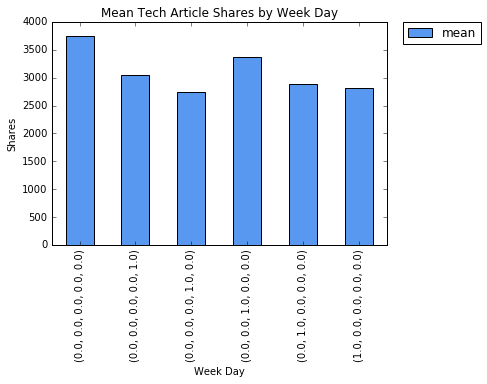

In [146]:
tech_articles = data_frame.ix[data_frame['is_tech'] == 1]
tech_articles = tech_articles.pivot_table('shares', index=['is_monday', 'is_tuesday', 'is_wednesday', 'is_thursday', 'is_friday'], aggfunc=[np.mean])
print tech_articles

tech_shares.plot(kind='bar', color=['#5898f1'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Mean Tech Article Shares by Week Day')
plt.xlabel('Week Day')
plt.ylabel('Shares')

### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on.
Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. 
Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could make a big difference with data science technology.
How are you planing to persuade the investors to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:



2) Why the problem is important to solve? 


3) What is your idea to solve the problem? 


4) What differences you could make with your data science approach?


5) Why do you believe the idea deserves the investment of the "sharks"?






### Problem 2: The Math Part (20 points)

Define the business problem as a math problem and design a math solution to the problem.


**Insert your answers here**


1) Problem formulation in Math:




2) Math Solution:






3) Implementation of the Solution


In [8]:
# your code here




### Problem 3: The Hacking Part  (20 points)


* Data Collection
* Implement a small Demo/Prototype/experiment result figures for the "product" of your data science company. You could use this demo during the Pitch

In [ ]:
# your code here






*------------------------

### Problem 4: Prepare a 90 second Pitch and *present* it in the class (20 points)

* Prepare the slide(s) for the Pitch (10 points)
* Present it in the class (10 points).

*Advice:  It should really only be one or two slides, but a really good one or two slides!  Also, it is ok to select one person on the team to give the 90 second pitch (though a very organized multi-person 90 second pitch can be very impressive!) *



# Report: communicate the results (20 points)

(1) (5 points) What is your business proposition?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: **NOTE, for this Case Study you need to prepare two (2) PPT files!**  One for the 90 second Pitch and one for a normal 10 minute presentation.

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.

     (please include figures or tables in the report, but no source code)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu with the subject: "[DS501] Case study 4".